# 🤖 LLM Basics - Understanding Large Language Models

## Executive-Level Learning Session

**Duration:** 60-75 minutes  
**Level:** Executive/CVP (Non-technical but conceptually rigorous)  
**Goal:** Build intuition for how LLMs work, their capabilities, and limitations

---

### 🎯 What You'll Learn

By the end of this session, you'll be able to:

1. **Understand What LLMs Are** - The core mechanism and scale
2. **Comprehend How They Work** - Training, fine-tuning, and generation
3. **Set Realistic Expectations** - Capabilities and fundamental limitations
4. **Make Informed Decisions** - When to use LLMs and how to deploy them safely

---

### 📋 Agenda

1. **What is a Large Language Model?** - Breaking down the name
2. **Architecture & Training** - How LLMs learn
3. **Text Generation** - How LLMs produce output
4. **Capabilities** - What LLMs do well
5. **Limitations** - Critical awareness of what can go wrong
6. **Practical Applications** - Real-world use cases and patterns
7. **Competitive Landscape** - Navigating vendor choices
8. **Security & Governance** - Enterprise considerations
9. **Future Trends** - What's coming next

Let's dive in! 🚀

## 0. Setup and Imports

We'll use minimal dependencies for this session - just visualization libraries and API access for demonstrations.

In [47]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple
import warnings
import sys
import os
warnings.filterwarnings('ignore')
# Add auto-reload for external modules
%load_ext autoreload
%autoreload 2

# Import helpers module
sys.path.append(os.path.join(os.getcwd(), 'helpers'))
from helpers import llm_basics as helpers

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Setup complete! Ready to explore LLMs.")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
✅ Setup complete! Ready to explore LLMs.


---

## 1. What is a Large Language Model?

Let's break down the name to understand what we're dealing with.

### 🔤 Breaking Down "Large Language Model"

**Large** = Billions of parameters (weights)  
**Language** = Trained on text data  
**Model** = Mathematical function that learns patterns

At its core, an LLM is a **next-word prediction machine** that has learned patterns from massive amounts of text.

### 📊 Visualization: The Scale of "Large"

Let's visualize what "large" really means when we talk about modern LLMs.

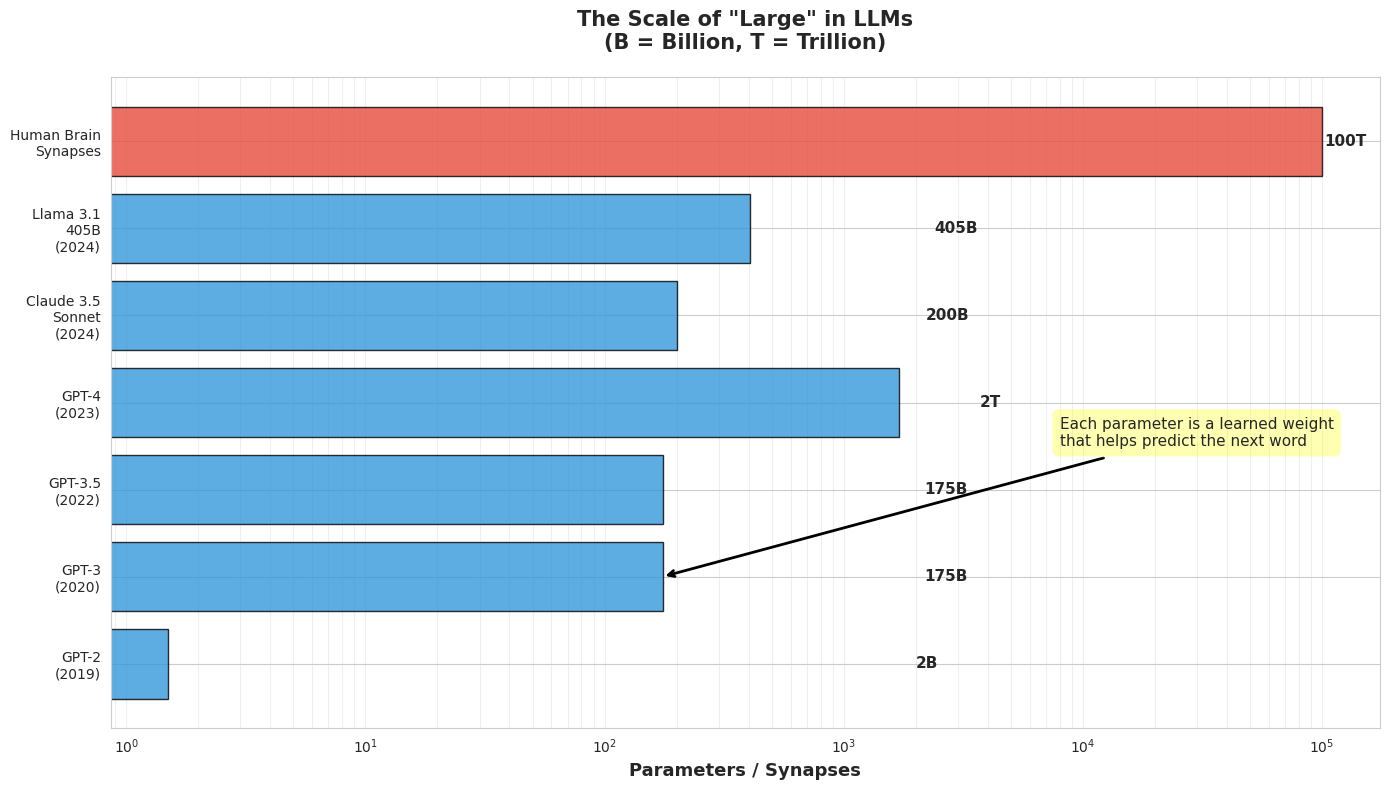


💡 Key Insight:
   - Modern LLMs have 100+ billion parameters
   - Each parameter is a number the model learned during training
   - More parameters = more capacity to learn patterns (but diminishing returns)
   - GPT-4 estimated to have ~1.7 trillion parameters (not confirmed)
   - Still orders of magnitude less than human brain synapses!


In [49]:
helpers.model_scale_comparison()

### 💾 Memory Requirements: Why Scale Matters

Understanding model size in memory helps explain why running LLMs requires massive GPU infrastructure.

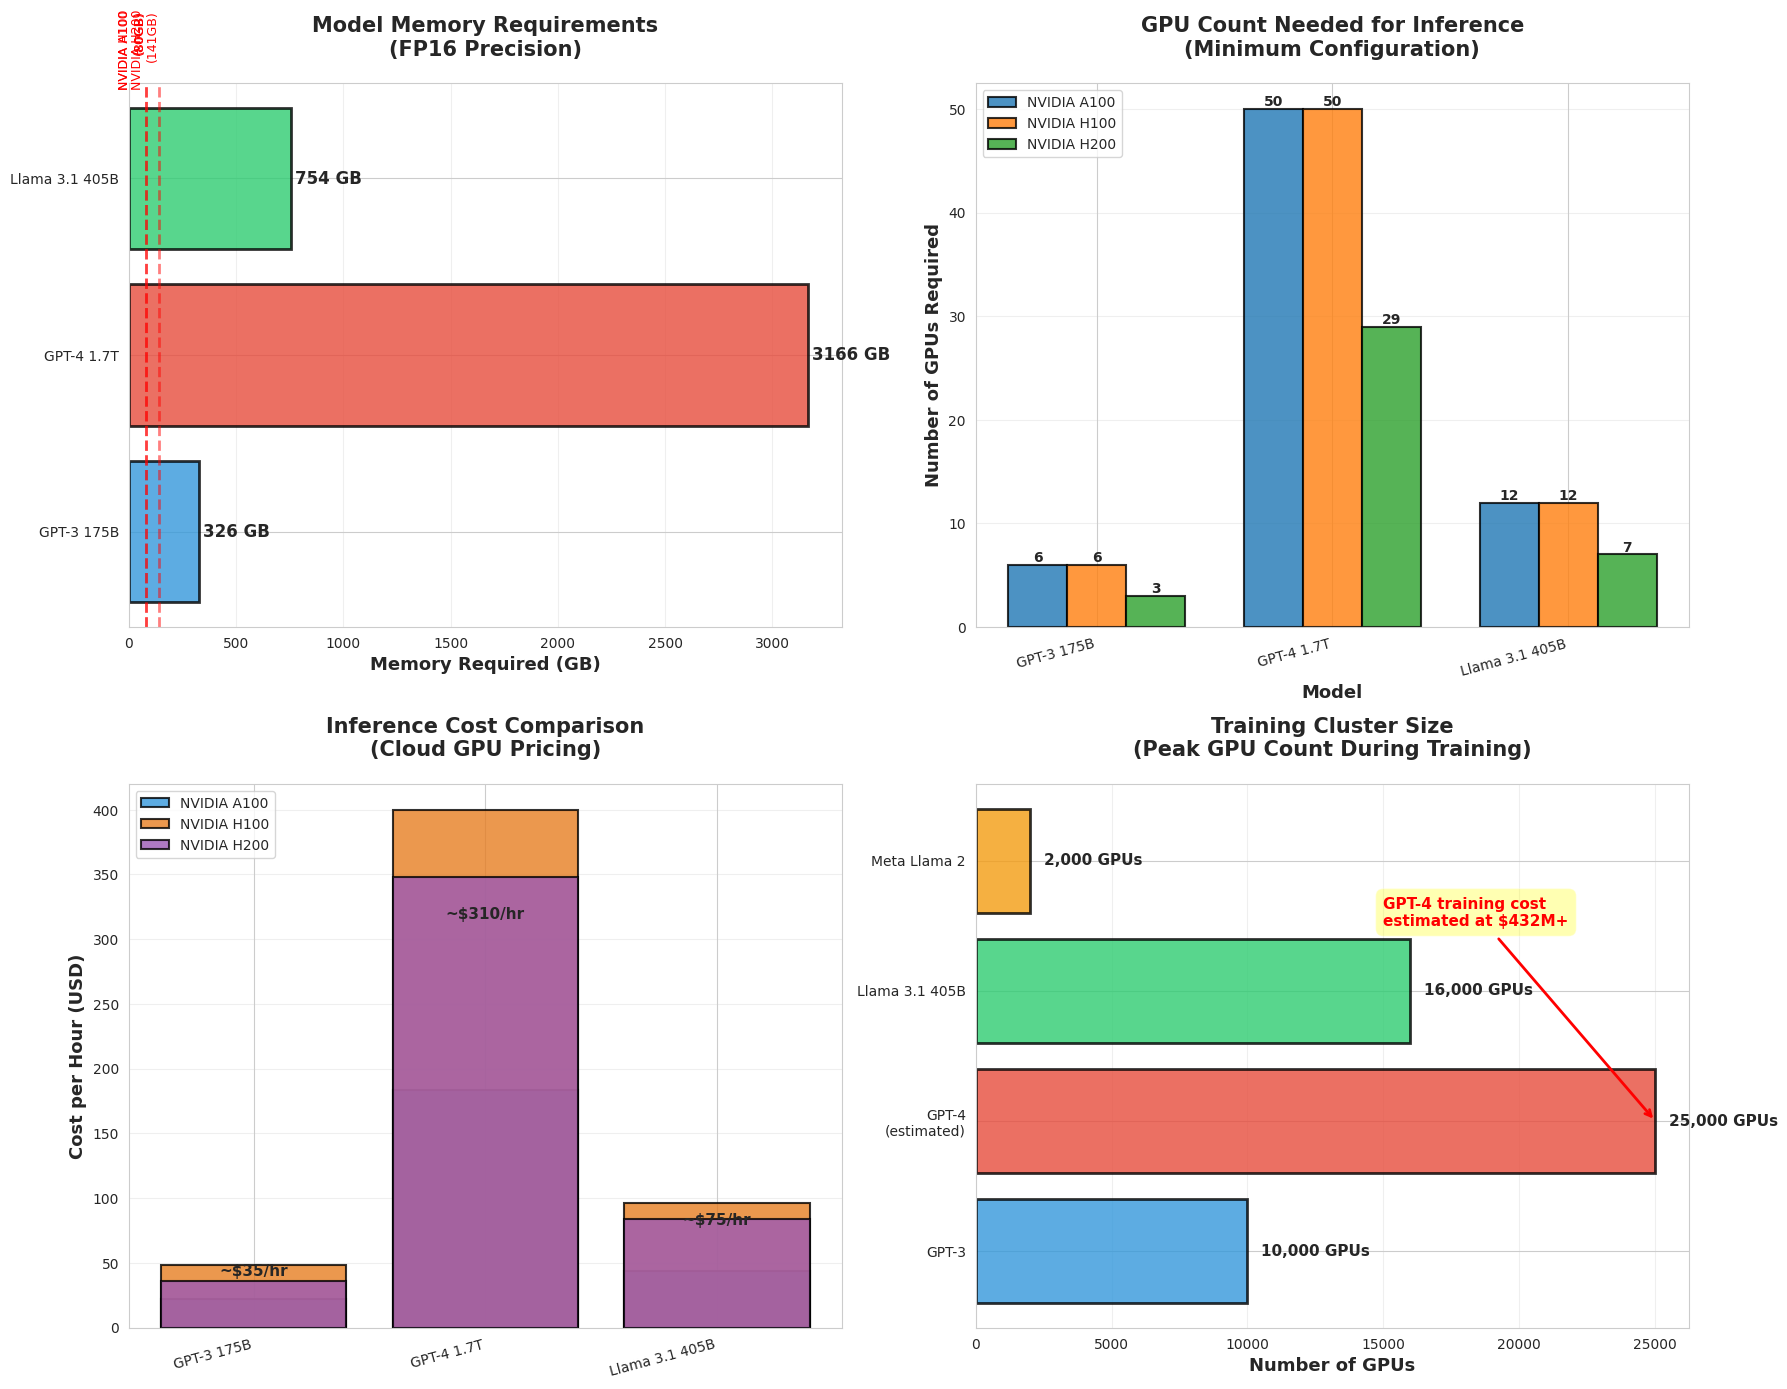


💰 Key Cost Insights:
   - GPT-3 (175B): ~326 GB memory
   - Minimum 6 x H100 GPUs needed for inference
   - Inference cost: ~$48/hour on H100s

   - GPT-4 (1.7T): ~3166 GB memory
   - Minimum 50 x H100 GPUs needed
   - Training required ~25,000 GPUs for months

⚡ Why This Matters:
   - Each API call runs on multi-GPU clusters
   - Operating at scale requires data center infrastructure
   - Cloud costs can reach millions per month for popular services
   - Smaller models (7B-70B) can run on single GPUs → edge deployment possible


In [50]:
helpers.calc_memory_and_costs()

### 🎯 Core Mechanism: Predict the Next Word

This is the **fundamental concept** - everything else builds on this.

**Example:** Given "The sky is ____", what comes next?

The LLM looks at the probability of each possible next word based on patterns it learned from training data.

**Live Demo:** We'll use Azure OpenAI to get REAL probabilities from an actual LLM!

#### 🔧 Setup Instructions (Optional)

To see real predictions from Azure OpenAI:

1. **Copy `.env.example` to `.env`** in the repository root:
   ```bash
   cp .env.example .env
   ```

2. **Edit `.env` file** with your Azure OpenAI credentials:
   ```bash
   AZURE_OPENAI_API_KEY=your-api-key-here
   AZURE_OPENAI_ENDPOINT=https://your-resource.openai.azure.com/
   AZURE_OPENAI_DEPLOYMENT=gpt-4o
   ```

3. **Run the cell below** - it will automatically load credentials from `.env`

If not configured, the code will use simulated data for demonstration purposes.

✅ Successfully connected to Azure OpenAI!


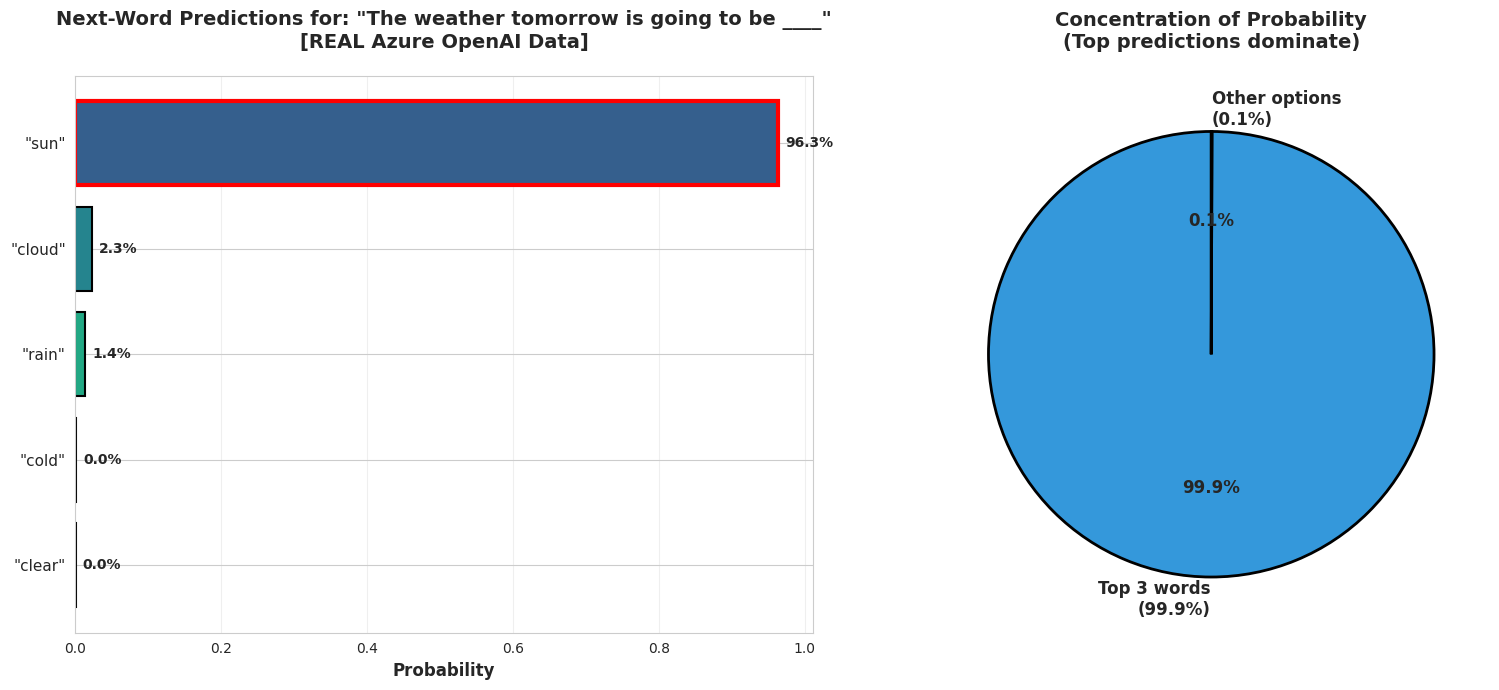


🎯 Next-Word Prediction Results:
   Prompt: 'The weather tomorrow is going to be ____'
   Most likely: 'sun' (96.3%)
   Runner-up: 'cloud' (2.3%)
   Third: 'rain' (1.4%)

💡 Key Insights:
   - Top 3 predictions account for 99.9% of probability
   - LLM assigns different probabilities based on training data patterns
   - Model is confident (highest prob: 96.3%)
   - Temperature controls randomness in final selection


In [124]:
# Try different prompts to see varying probability distributions:
# - "The sky is" → Very predictable (blue, clear, cloudy)
# - "I feel" → More varied emotions/states
# - "The secret ingredient is" → Creative, many possibilities
# - "Tomorrow I will" → Open-ended actions
prompt = "The weather tomorrow is going to be"
# prompt = "If it rains today, the weather tomorrow is going to be"
# prompt = "If it's fall season and it rains today, the weather tomorrow is going to be"
helpers.visualize_real_next_word_predictions(prompt)

### 🔢 From Words to Numbers: Tokenization

LLMs can't work with text directly - they need numbers. This process is called **tokenization**.

Check yourself -> [GPT Tokenizer](https://platform.openai.com/tokenizer)

**Key Concept:** Text → Tokens → Numbers → Model Processing

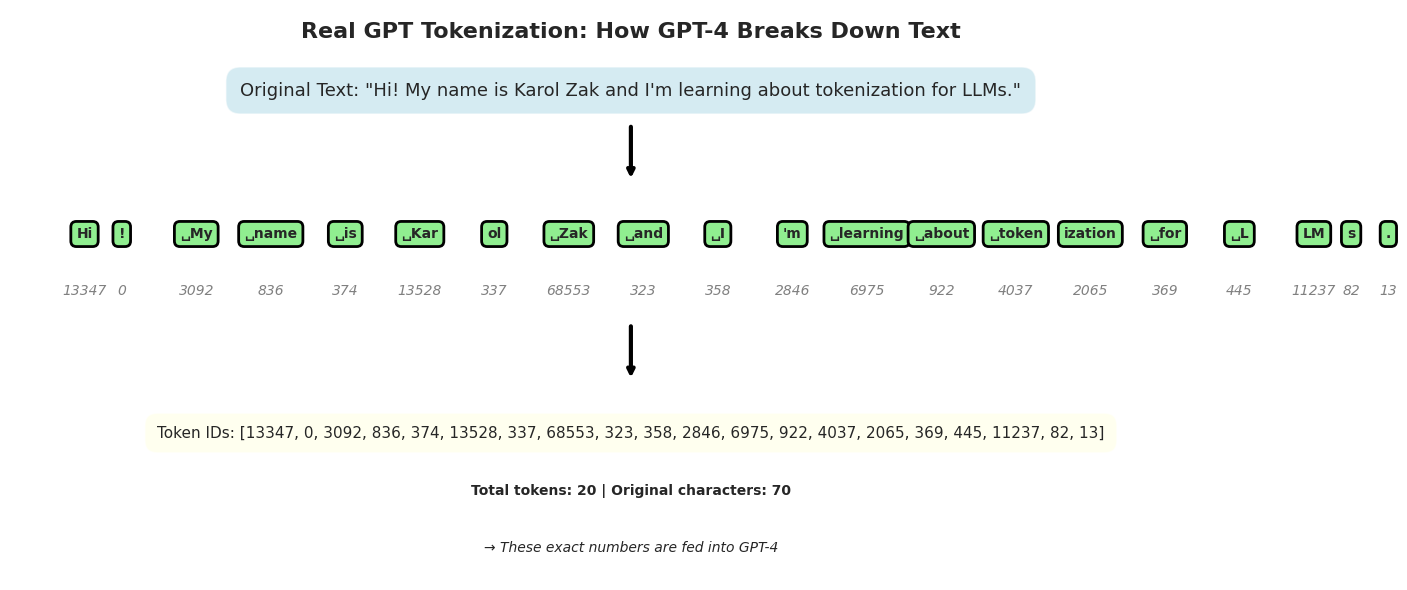


🔍 Real GPT-4 Tokenization Results:
   Original text: 'Hi! My name is Karol Zak and I'm learning about tokenization for LLMs.'
   Number of tokens: 20
   Tokens: ['Hi', '!', ' My', ' name', ' is', ' Kar', 'ol', ' Zak', ' and', ' I', "'m", ' learning', ' about', ' token', 'ization', ' for', ' L', 'LM', 's', '.']
   Token IDs: [13347, 0, 3092, 836, 374, 13528, 337, 68553, 323, 358, 2846, 6975, 922, 4037, 2065, 369, 445, 11237, 82, 13]


In [109]:
text_example = "Strawberry has three r's"
text_example = "Hi! My name is Karol Zak and I'm learning about tokenization for LLMs."
helpers.visualize_real_tokenization(text_example)

### 📚 Vocabulary Size: The Token Dictionary

Every LLM has a fixed **vocabulary** - a dictionary mapping tokens to numbers. Understanding vocabulary size is crucial for grasping LLM architecture and limitations.

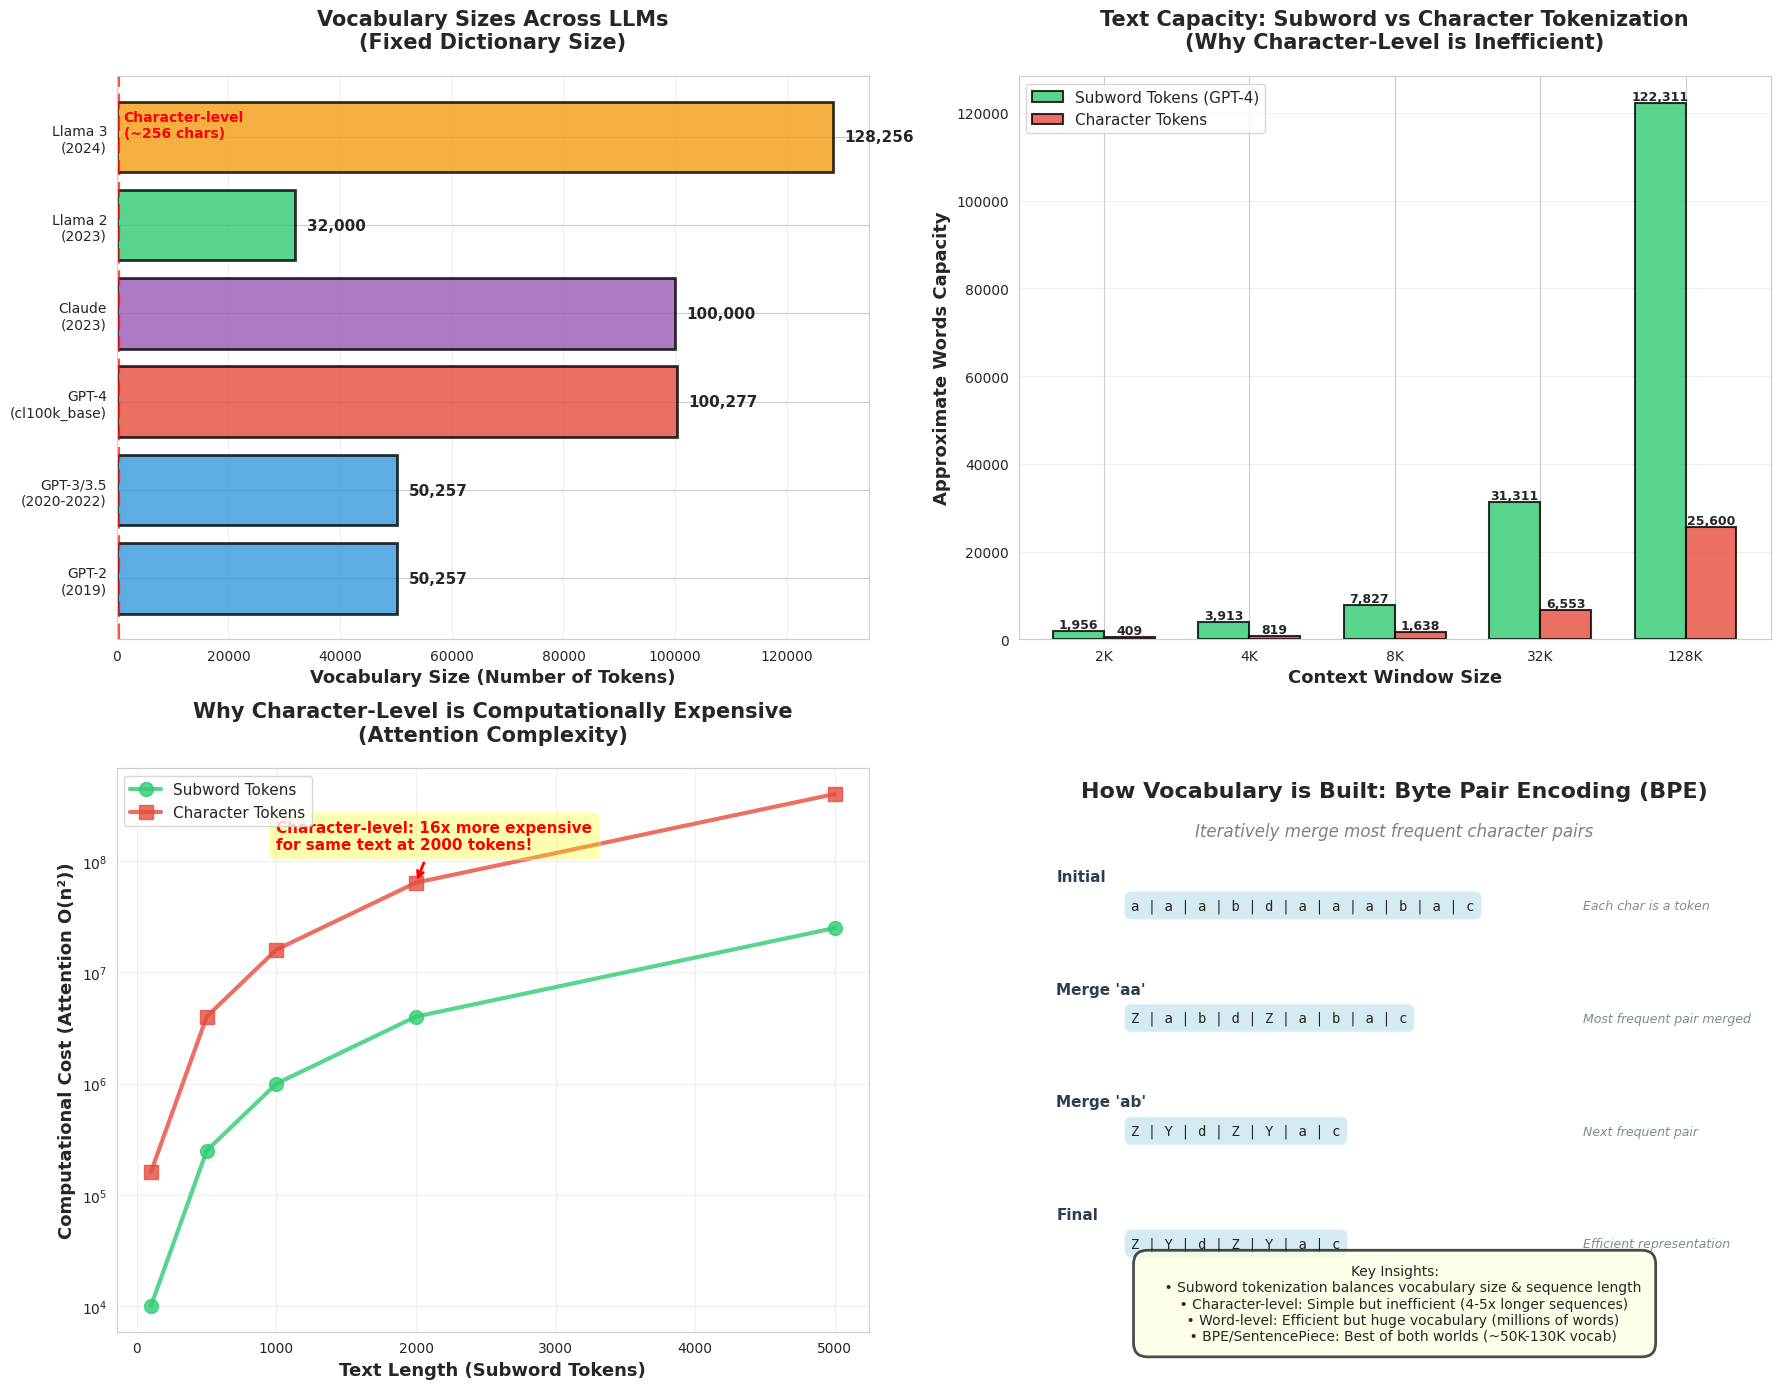


📊 Vocabulary Analysis:
   Example: 'The quick brown fox jumps over the lazy dog'
   - Character tokens: 43
   - GPT-4 subword tokens: 9
   - Compression ratio: 4.8x

🎯 Why Not Character-Level Tokenization?
   1. Sequence Length: 4-5x longer for same text
   2. Computational Cost: O(n²) attention → 16x more expensive
   3. Context Window: Wastes precious context on characters, not meaning
   4. Training Time: Longer sequences = slower training

💡 Why Subword Tokenization Wins:
   ✓ Balanced vocabulary size (50K-130K tokens)
   ✓ Efficient sequence length (~4x shorter than characters)
   ✓ Handles rare words via subword units
   ✓ Language-agnostic (works across all languages)
   ✓ Optimal for attention mechanisms

🔧 Popular Tokenization Methods:
   - BPE (Byte Pair Encoding): GPT models
   - SentencePiece: Llama, PaLM models
   - WordPiece: BERT


In [111]:
helpers.compare_vocab_sizes()

### 📚 Training Data: What LLMs Learn From

Modern LLMs are trained on massive amounts of text data from diverse sources.

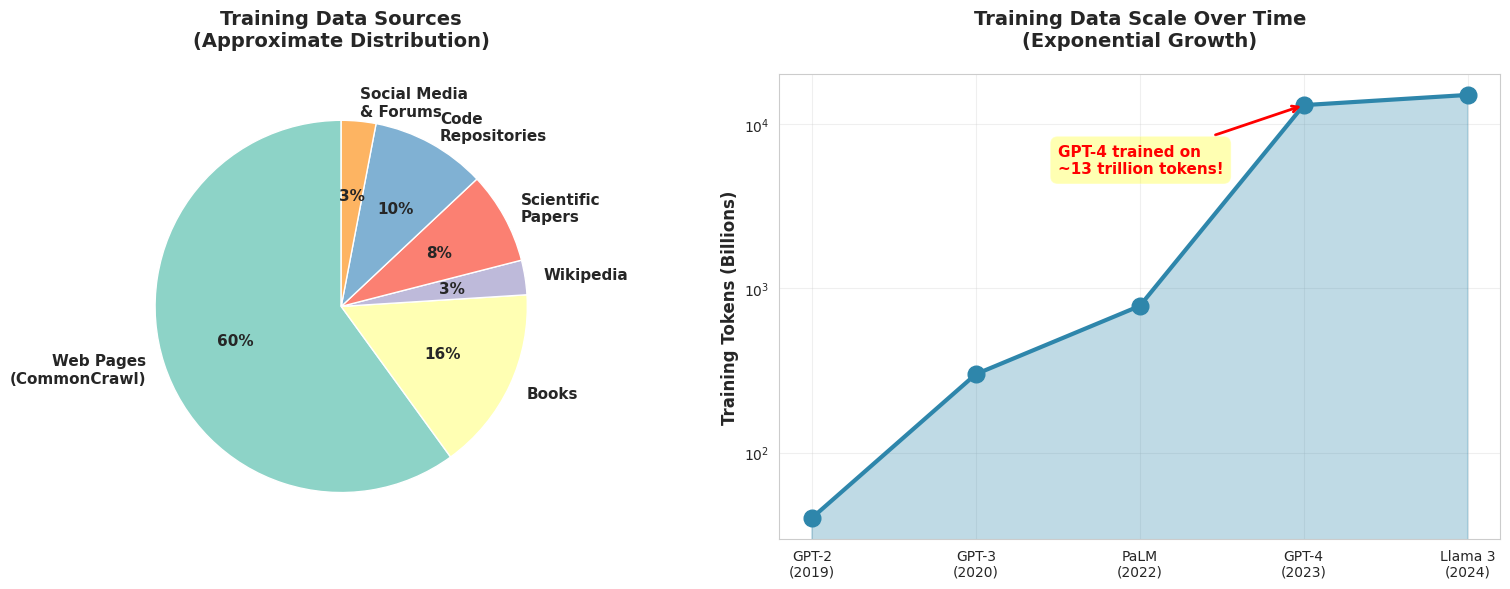


📊 Training Data Facts:
   - GPT-3: ~500 billion tokens (~1 million books equivalent)
   - GPT-4: ~13 trillion tokens (estimated)
   - Cost: $10M - $100M+ just for compute
   - Time: Months of training on thousands of GPUs

⚠️  Critical Insight:
   - Quality of training data = Quality of model behavior
   - Biases in data → Biases in model
   - Cutoff date means no knowledge of events after training


In [112]:
helpers.visualize_training_data()

---

## 2. The Architecture: How LLMs Actually Work

Now that we understand what LLMs are, let's explore how they're built and trained.

### 🏗️ The Training Pipeline

LLMs go through multiple training phases, each serving a different purpose.

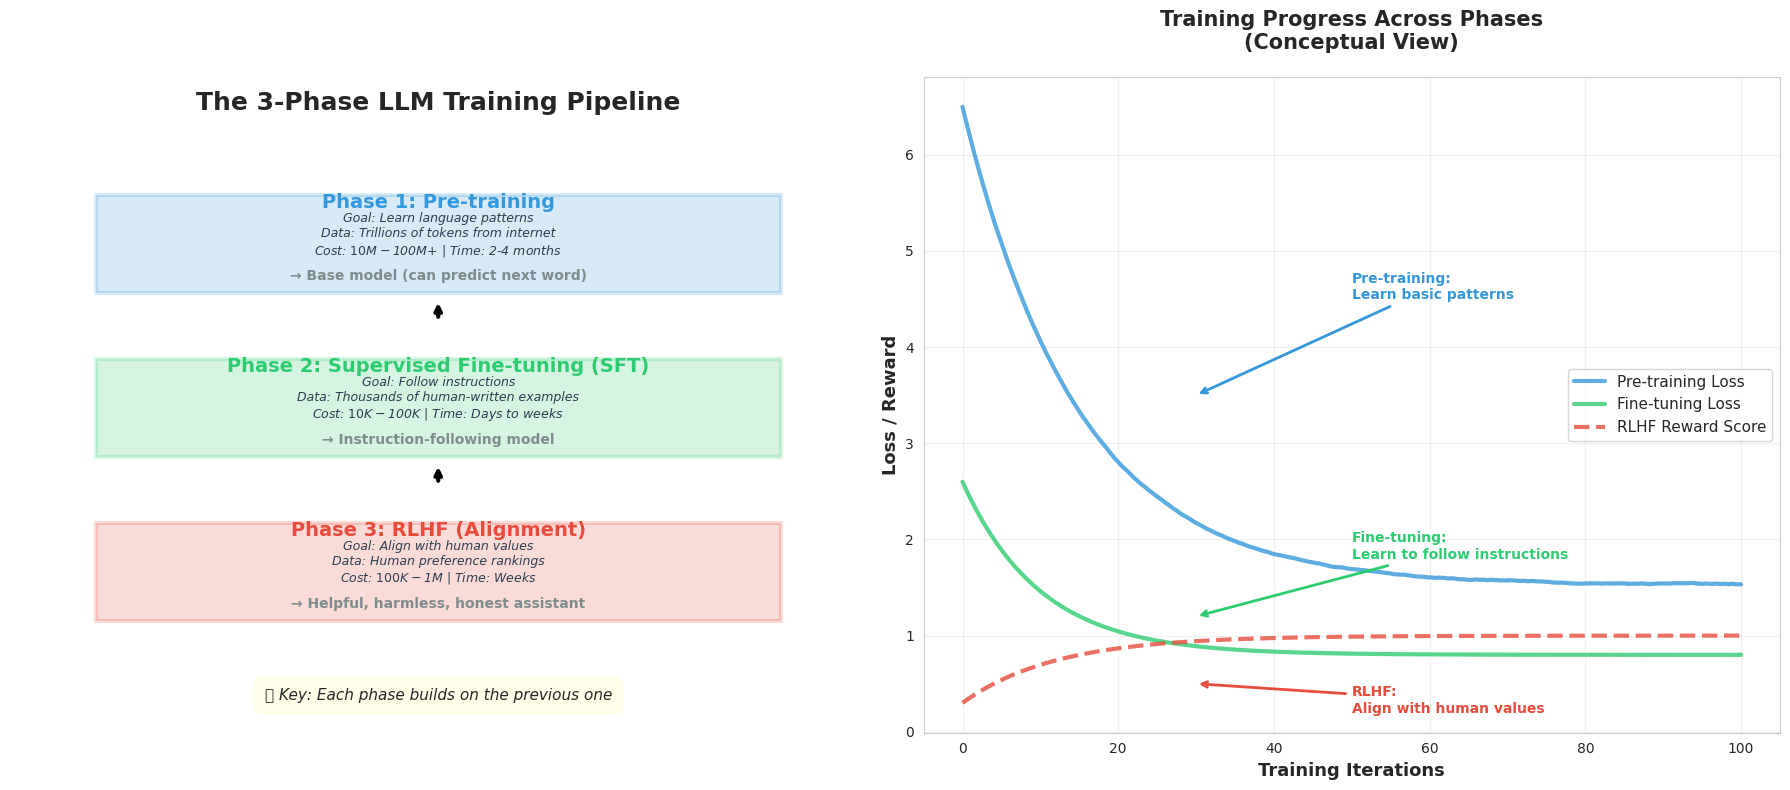


🎓 Training Pipeline Explained:

📘 Phase 1: Pre-training (The Foundation)
   - Model reads trillions of words from the internet
   - Learns to predict the next word in any context
   - Acquires world knowledge, grammar, facts, reasoning patterns
   - Result: A 'base model' that can complete text
   - Example: GPT-4 base (before instruction tuning)

📗 Phase 2: Supervised Fine-tuning (SFT)
   - Humans write examples of good assistant behavior
   - Model learns to respond to instructions
   - Thousands of high-quality examples (not billions)
   - Result: Model follows instructions reliably
   - Example: Can answer 'Write a poem about AI'

📕 Phase 3: RLHF (Reinforcement Learning from Human Feedback)
   - Humans rank multiple model outputs (A vs B)
   - Model learns what humans prefer
   - Teaches helpfulness, harmlessness, honesty
   - Result: ChatGPT-like behavior
   - Example: Politely declines harmful requests

💰 Cost Implications:
   - Pre-training: 95%+ of total cost
   - Fine-tuning:

In [120]:
helpers.visualize_training_pipeline()

---

## 3. How LLMs Generate Text

Understanding the generation process helps explain LLM behavior, costs, and limitations.

Play yourself -> [Temperature Visualizer](https://andreban.github.io/temperature-topk-visualizer/)

### 🎲 Temperature and Sampling: Controlling Creativity

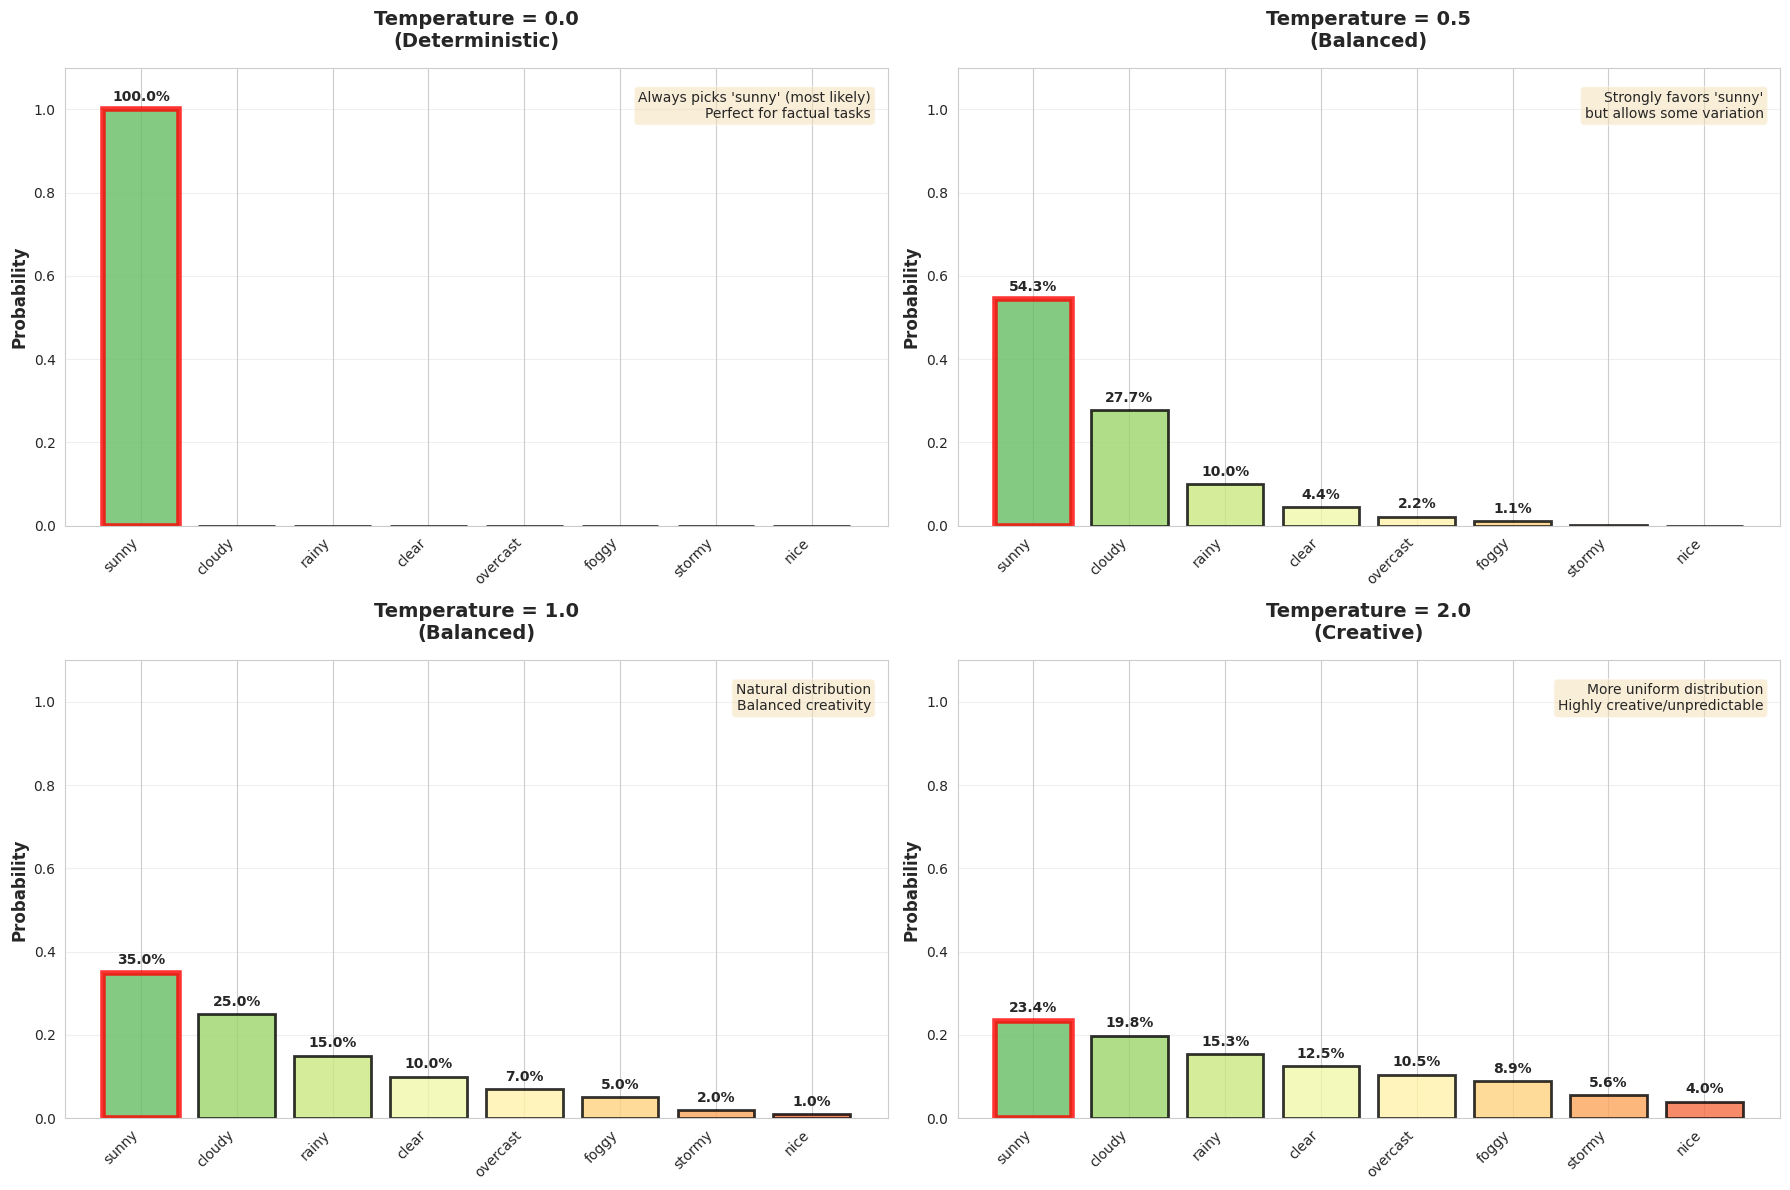


🎲 Temperature Parameter Explained:

🔵 Temperature = 0 (Deterministic)
   - Always picks the most likely token
   - Same input → Same output every time
   - Use cases: Code generation, data extraction, factual Q&A
   - Example: '2+2=' → always outputs '4'

🟢 Temperature = 0.5-0.7 (Focused)
   - Slightly randomized but coherent
   - Good for most production use cases
   - Use cases: Customer support, summaries, analysis

🟡 Temperature = 1.0 (Balanced)
   - Natural probability distribution
   - Good balance of creativity and coherence
   - Use cases: General conversation, writing assistance

🔴 Temperature = 1.5-2.0 (Creative)
   - Highly randomized, unpredictable
   - Can generate surprising/unusual outputs
   - Use cases: Creative writing, brainstorming, poetry
   - Risk: May lose coherence

💡 Business Implications:
   - Lower temperature = More reliable, predictable (better for automation)
   - Higher temperature = More creative, diverse (better for ideation)
   - Different use cases n

In [121]:
helpers.visualize_temperature_effects()

### 🔄 Token-by-Token Generation: The Autoregressive Process

LLMs generate text one token at a time, each depending on all previous tokens. This is why generation feels sequential and "thoughtful".

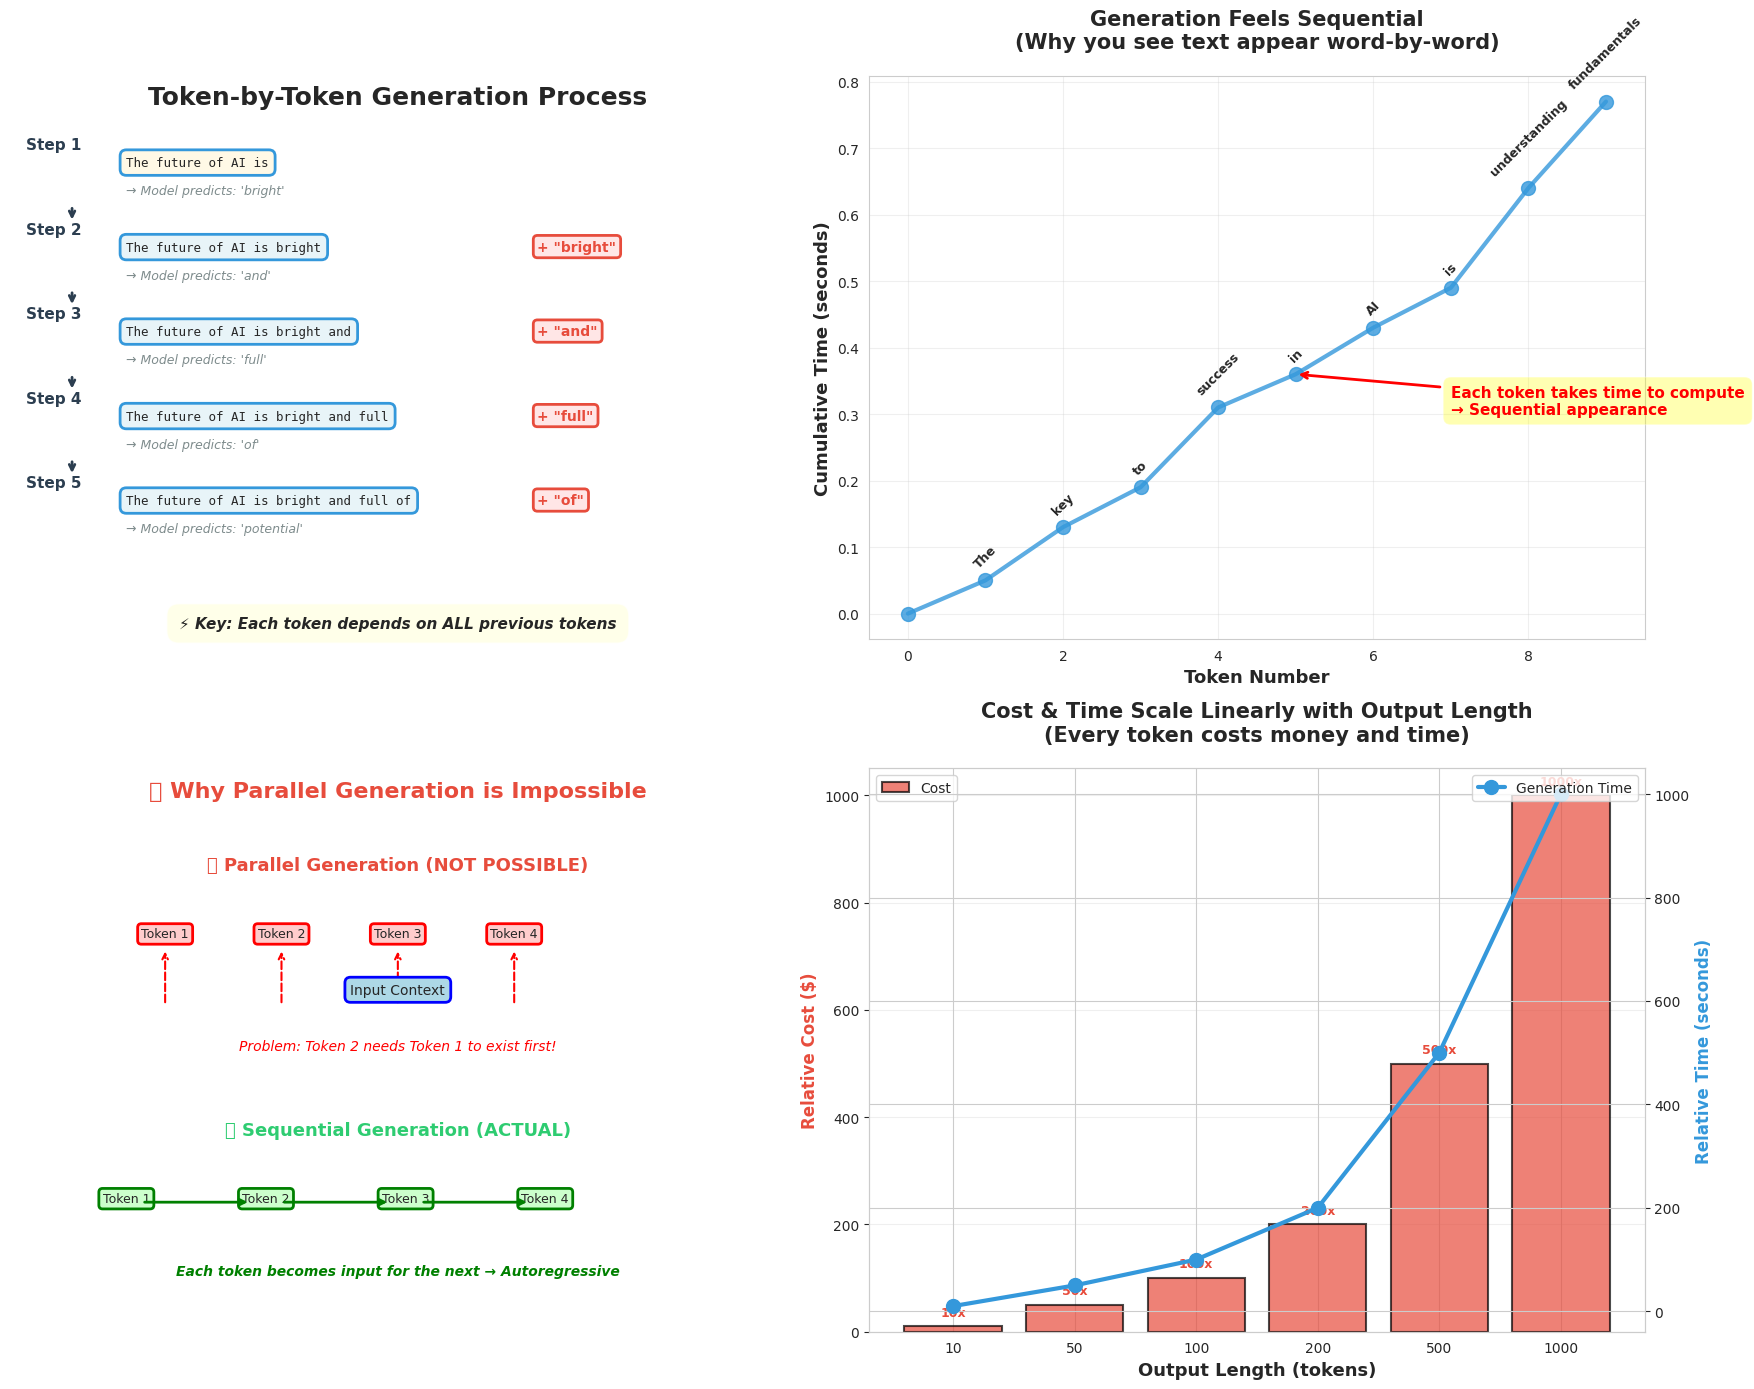


🔄 Token-by-Token Generation Explained:

📝 Autoregressive Process:
   1. Model reads your prompt
   2. Predicts most likely next token
   3. Adds that token to the context
   4. Predicts next token (considering ALL previous tokens)
   5. Repeats until done (stop token or max length)

⏱️ Why It Feels Like 'Thinking':
   - Each token takes ~50-200ms to generate
   - Appears sequentially, not all at once
   - Longer responses take proportionally longer
   - Gives impression of 'reasoning' or 'writing'
   - Reality: Pure prediction, no actual thinking

🚫 Why Parallel Generation is Impossible:
   - Token N depends on tokens 1 through N-1
   - Can't predict Token 3 without knowing Token 2
   - Must process sequentially (autoregressive)
   - This is fundamental to transformer architecture

💰 Cost Implications:
   - Every output token costs money
   - 1000-token output ≈ 100x more expensive than 10-token
   - Longer outputs = higher latency
   - Optimize: Be specific to get concise answers

⚡ 

In [123]:
helpers.visualize_token_by_token()